## Simulation und Modellierung WS16/17
### Uebung 08

Schauen Sie sich den folgenden Code an, und versuchen Sie zu verstehen, was dieser macht :

In [2]:
# Random-Walk-Simulation fuer 200 Teilchen

import numpy as np

s2 = 0.1  # Varianz
m = 0.01  # Mittelwert
Nn = np.array([1, 10, 50, 100, 500, 1000])  # Zeitschritte
Nmax = max(Nn)

# Oeffne File.
f = open('single_particle_random_walks.dat', 'w')

# Beschreibung und Kopfzeile
f.write('#200 single particle positions at 6 different time steps\n')
f.write('# nr. x(n) for n=')
for n in Nn:
    f.write(str(n)+" ")
f.write('\n#\n')

# Schreibe Positionen fuer alle Objekte ins File.
for nr in range(200):
    f.write(str(nr)+" ")
    # Schritte der mittleren Laenge m mit Standardabweichung sqrt(s2);
    # Zufallsgenerator erzeugt Uni-Verteilung, Breite 1, Mittelwert 0.5;
    # cumsum() berechnet absolute Position.
    x = np.cumsum((np.random.rand(Nmax)-0.5) * np.sqrt(s2) + m)
    for n in Nn:
        # Schreibe n-ten Wert mit Breite 10 in File;
        # runde auf 5 Nachkommastellen.
        f.write('{:10.5f} '.format(x[n-1]))
    f.write('\n')

# Schliesse File.
f.close()

Fuehren Sie den Code aus, und schauen sich den Inhalt der Datei `single_particle_random_walks.dat` an. Laden Sie sich die Daten in ein `numpy` Array

In [3]:
data = np.loadtxt('single_particle_random_walks.dat')

- Plotten Sie alle Trajektorien x(n) in ein Diagramm (eine Zeile der Tabelle ist eine Trajektorie)
- Plotten Sie zu jeder Spalte von x-Werten ein Histogramm der Wahrscheinlichkeitsdichte. 
- Plotten Sie die Mittelwerte der Spalten x(n) als Funktion von n mit Fehlerbalken der Laenge einer Standardabweichung.
- Plotten Sie die Standardabweichung als Funktion von n und versuchen Sie durch geeignete Skalierung der Koordinatenaxen herauszubekommen, welcher funktionale Zusammenhang besteht.

Beschriften Sie die Achsen der Plots.

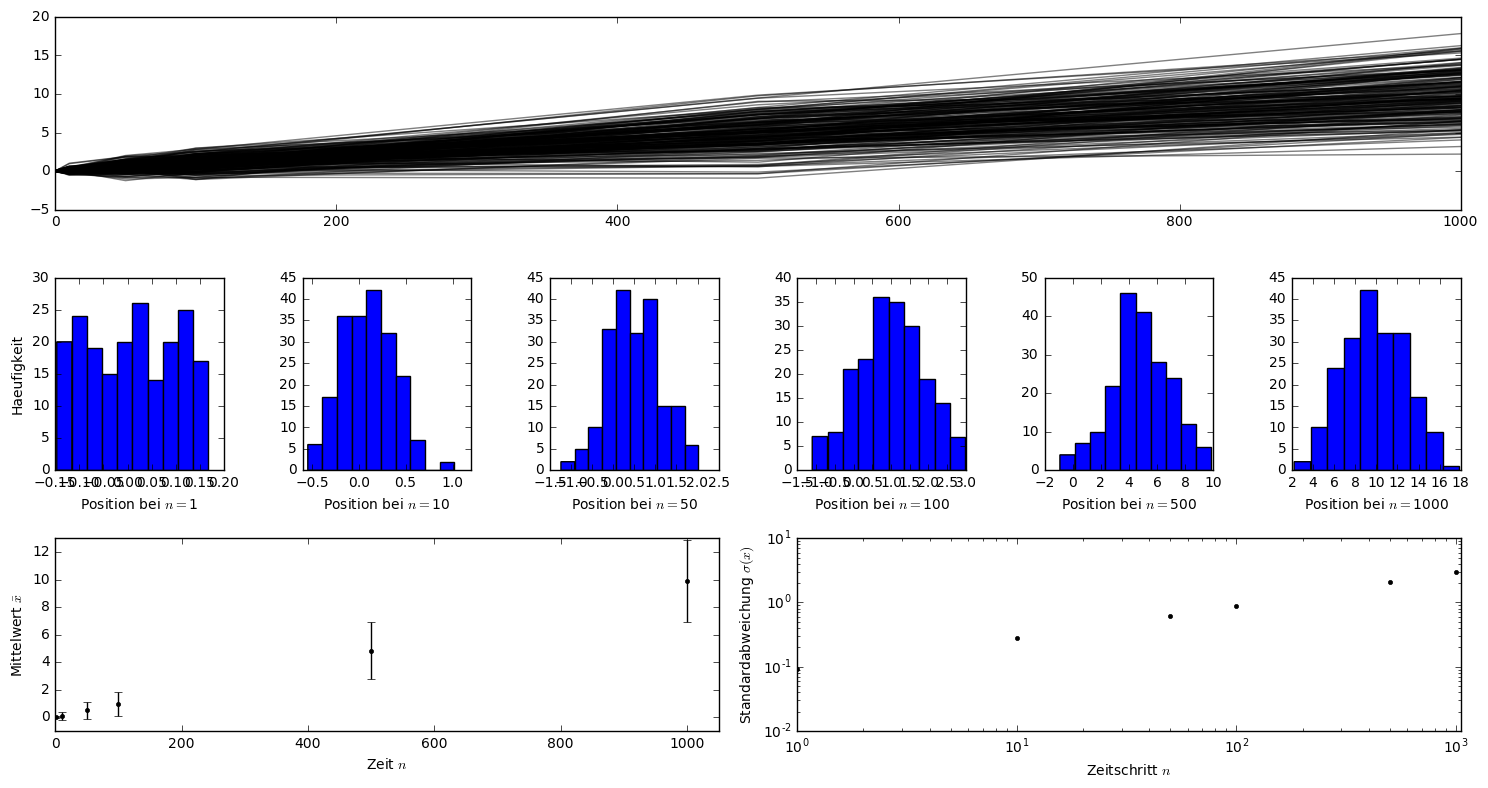

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(15.0, 8.0))
# Trajektorien
plt.subplot2grid((3, 6), (0, 0), colspan=6)
plt.plot(Nn, data[:, 1:].T, color=(0, 0, 0, 0.5))
# Histogramme
for j in range(6):
    plt.subplot2grid((3, 6), (1, j))
    plt.hist(data[:, j+1])  # Histogramm der Spalte j
    plt.xlabel('Position bei $n=$'+str(Nn[j]))
    if j == 0:
        plt.ylabel('Haeufigkeit')
# Mittelwerte mit Fehlerbalken der Breite 2*std
plt.subplot2grid((3, 6), (2, 0), colspan=3)
for i in range(len(Nn)):
    plt.plot(Nn[i], np.mean(data[:, i+1]), '.k')
    plt.errorbar(Nn[i], np.mean(data[:, i+1]), color='k', yerr=(np.std(data[:, i+1])))
    plt.xlim([0, 1050])
    plt.ylim([-1, 13])
    plt.xlabel('Zeit $n$')
    plt.ylabel('Mittelwert $\\bar{x}$')
# Standardabweichungen
plt.subplot2grid((3, 6), (2, 3), colspan=3)
for i in range(len(Nn)):
    plt.loglog(Nn[i], np.std(data[:, i+1]), '--.k')
    plt.xlim([0, 1050])
    plt.xlabel('Zeitschritt $n$')
    plt.ylabel('Standardabweichung $\sigma(x)$')
fig.tight_layout()

Die Verteilung aendert sich mit der Zeit von einer Art Gleichverteilung zu einer Art Normalverteilung.

Der loglog-Plot der Standardabweichungen legt nahe, dass es sich um eine Proportionalitaet der Form
$$
\begin{align*}
  \log \sigma(x) &= a \log n + b \\
  \leftrightarrow \sigma(x) &= e^{a \log n} e^b = c n^a
\end{align*}
$$
handelt.